In [1]:
from train import train_vqvae, DEVICE, train_pixel_cnn, test_pixel_cnn
from predict import generate_samples
from modules.vqvae import VQVAE
from modules.pixelcnn import PixelCNN
from dataset import train_dl, test_dl, NumpyDataset, codebook_transform, batch_size
from torch.utils.data import DataLoader
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

def show(img):
    """
    Plotting func
    """
    np_img = img.numpy()
    fig = plt.imshow(np.transpose(np_img, (1, 2, 0)), interpolation='nearest')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [2]:
model = VQVAE(latent_dim=128, res_h_dim=32, num_embeddings=512, embedding_dim=64, beta=0.25)
model.to(DEVICE)
EPOCHS = 2

optim = torch.optim.Adam(model.parameters(), lr=1e-3)

In [3]:
training_reconstruction_loss = []
for i in range(EPOCHS):
    print(f"=======================EPOCH = {i + 1}======================")
    loss = train_vqvae(dl=train_dl, model=model, optim=optim)
    training_reconstruction_loss.append(loss)
    print(f"Reconstruction loss: {loss}")

=======================EPOCH = 1======================
batch    0/354 	 |current loss: 0.742655
batch   25/354 	 |current loss: 0.554974
batch   50/354 	 |current loss: 0.227568
batch   75/354 	 |current loss: 0.175157
batch  100/354 	 |current loss: 0.576772
batch  125/354 	 |current loss: 0.240919
batch  150/354 	 |current loss: 0.157053
batch  175/354 	 |current loss: 0.168542
batch  200/354 	 |current loss: 0.190029
batch  225/354 	 |current loss: 0.134977
batch  250/354 	 |current loss: 0.263361
batch  275/354 	 |current loss: 0.207442
batch  300/354 	 |current loss: 0.105172
batch  325/354 	 |current loss: 0.086030
batch  350/354 	 |current loss: 0.104670
Reconstruction loss: 0.24164085382711417
=======================EPOCH = 2======================
batch    0/354 	 |current loss: 0.070728
batch   25/354 	 |current loss: 0.092708
batch   50/354 	 |current loss: 0.095655
batch   75/354 	 |current loss: 0.123409
batch  100/354 	 |current loss: 0.138894
batch  125/354 	 |current los

In [4]:
test_real = next(iter(test_dl))  # load some from test dl
test_real = test_real[0]
test_real = test_real.to(DEVICE)
pre_conv = model.pre_quantization_conv(model.encoder(test_real))  # encoder, reshape
_, test_quantized, _, _ = model.vector_quantizer(pre_conv)
test_reconstructions = model.decoder(test_quantized)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


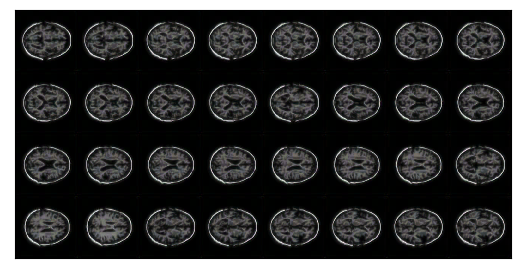

In [5]:
# show reconstructed images
show(torchvision.utils.make_grid(test_reconstructions.cpu()))

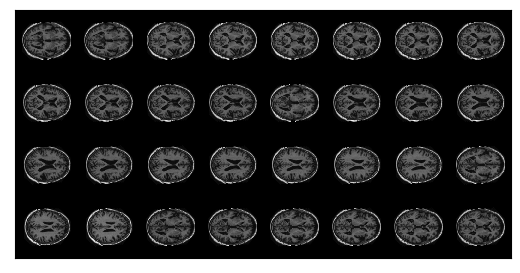

In [6]:
# show original images
show(torchvision.utils.make_grid(test_real.cpu()))

torch.Size([1, 3, 256, 256])
tensor([ 29, 244, 279, 283, 344, 373, 449])


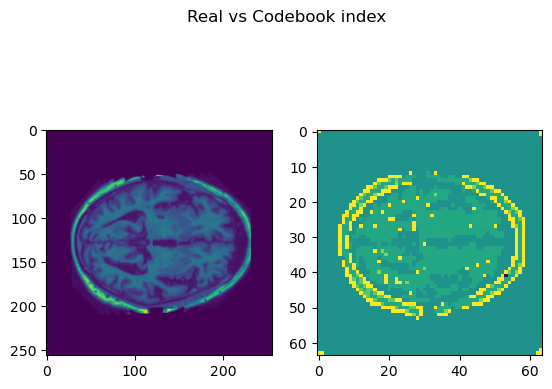

In [7]:
test_input = next(iter(test_dl))
test_input = test_input[0][0]
test_input = test_input.unsqueeze(0)
print(test_input.shape)
test_input = test_input.to(DEVICE)
test_encoded = model.encoder(test_input)
test_encoded = model.pre_quantization_conv(test_encoded)
_, test_encoded, encodings, indices = model.vector_quantizer(test_encoded)
decoded = model.decoder(test_encoded)
# Plot codebook index
plot_image = indices.view(64, 64)
print(torch.unique(indices.to('cpu')))
plot_image = plot_image.to('cpu')
detached_image = plot_image.detach().numpy()

test_input = test_input[0][0].cpu().detach().numpy()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Real vs Codebook index')
ax1.imshow(test_input)
ax2.imshow(detached_image)

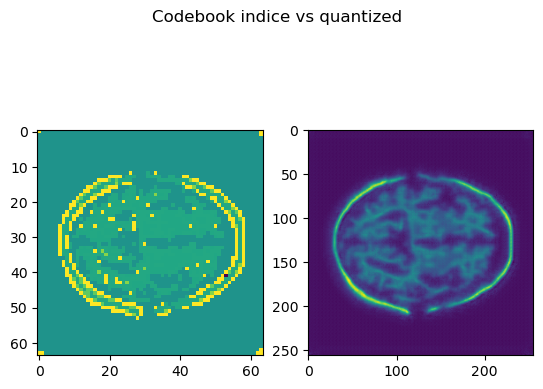

In [8]:
# Convert Codebook index to quantized
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Codebook indice vs quantized')
indices_quantized = model.vector_quantizer.get_quantized(indices)
decoded_quantized_indices = model.decoder(indices_quantized)
immi = decoded_quantized_indices[0]
immi = immi.to('cpu')
immi = immi.detach().numpy()
ax2.imshow(immi[1])
ax1.imshow(indices.cpu().view(64, 64).detach().numpy())

In [ ]:
real = next(iter(test_dl))
data = (iter(test_dl), 'end')
codebook_data = []
while True:
    next_val = next(data)
    if next_val == 'end':
        break
    else:
        pre_conv = model.pre_quantization_conv(model.encoder(next_val))  # encoder, reshape
        _, test_quantized, _, _ = model.vector_quantizer(pre_conv)

        codebook_data.append(test_quantized)

#train test split
length = len(codebook_data)
codebook_test = codebook_data[((3 * length)//4), :]
codebook_train = codebook_data[:, ((3 * length)//4)]

codebook_train_set = NumpyDataset(data=codebook_train, targets=[1], transform=codebook_transform)
codebook_test_set = NumpyDataset(data=codebook_test, targets=[1], transform=codebook_transform)
codebook_train_dl = DataLoader(codebook_train_set, batch_size=batch_size)
codebook_test_dl = DataLoader(codebook_test_set, batch_size=batch_size)

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Si

torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])
torch.Size([7])


In [ ]:
pixel_cnn = PixelCNN(512, 256**2, 32).to(DEVICE)
criterion = torch.nn.CrossEntropyLoss().to(DEVICE)
opt = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
BEST_LOSS = 999
LAST_SAVED = -1
cnn_epochs = 5
for epoch in range(1, cnn_epochs):
    print("\nEpoch {}:".format(epoch))
    train_pixel_cnn(pixel_cnn, codebook_train_dl, criterion, 512, opt)
    cur_loss = test_pixel_cnn(pixel_cnn, codebook_test_dl, criterion, 512)

    if cur_loss <= BEST_LOSS:
        BEST_LOSS = cur_loss
        LAST_SAVED = epoch

        print("Saving model!")
        torch.save(model.state_dict(), 'results/{}_pixelcnn.pt'.format(codebook_train_dl))

    generate_samples(pixel_cnn, 256)

In [ ]:
torch.save(codebook_train_dl, 'codebook-train-dl.pth')
torch.save(codebook_test_dl, 'codebook-test-dl.pth')